In [36]:
import numpy as np

def target_function(x):
    return np.sin(x)


In [37]:
x_train = np.linspace(-np.pi, 2*np.pi, 1000).reshape(-1, 1)
y_train = target_function(x_train)

x_test = np.linspace(-np.pi, 2*np.pi, 700).reshape(-1, 1)
y_test = target_function(x_test)



In [38]:
import torch
from torch import nn

class TwoLayerNet(nn.Module):
    def __init__(self):
        super(TwoLayerNet, self).__init__()
        self.linear1 = nn.Linear(1, 10)  # 输入特征维度为1，第一层10个神经元
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(10, 1)  # 第二层10个神经元，输出特征维度为1

    def forward(self, x):
        x = self.relu(self.linear1(x))
        x = self.linear2(x)
        return x

model = TwoLayerNet()


In [39]:
criterion = nn.MSELoss()  # 使用均方误差作为损失函数
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # 使用Adam优化器

# 将数据转换为torch tensors
x_train_tensor = torch.Tensor(x_train)
y_train_tensor = torch.Tensor(y_train)
x_test_tensor = torch.Tensor(x_test)
y_test_tensor = torch.Tensor(y_test)

# 训练过程
for epoch in range(1000):
    optimizer.zero_grad()
    output = model(x_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()
    
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')


Epoch 0, Loss: 1.802477240562439
Epoch 100, Loss: 0.1732972264289856
Epoch 200, Loss: 0.1110244020819664
Epoch 300, Loss: 0.09644757956266403
Epoch 400, Loss: 0.09406374394893646
Epoch 500, Loss: 0.09346962720155716
Epoch 600, Loss: 0.09323602169752121
Epoch 700, Loss: 0.09313160926103592
Epoch 800, Loss: 0.09308325499296188
Epoch 900, Loss: 0.0930589810013771


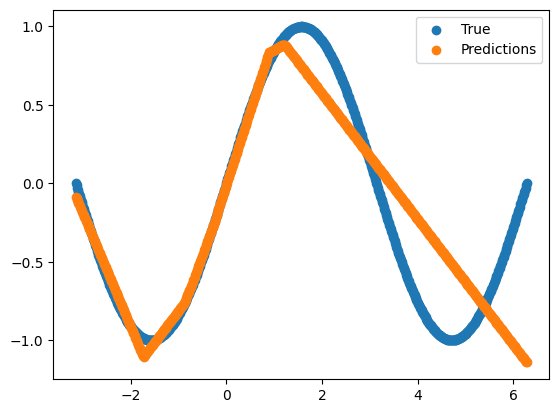

In [40]:
with torch.no_grad():
    predictions = model(x_test_tensor).numpy()

import matplotlib.pyplot as plt

plt.scatter(x_test, y_test, label='True')
plt.scatter(x_test, predictions, label='Predictions')
plt.legend()
plt.show()
